<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="taxi.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Taxi Fare Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Data Definition


unique_id: Unique identifier or key for each record in the dataset - (string)

date_time_of_pickup: time when the ride started - (timestamp)

longitude_of_pickup: Longitude of the taxi ride pickup point - (float) - (Numerical)

latitude_of_pickup: Latitude of the taxi ride pickup point - (float) - (Numerical)

longitude__of_dropoff: Longitude of the taxi ride dropoff point - (float) - (Numerical)

latitude_of_dropoff: Latitude of the taxi ride dropoff point - (float) - (Numerical)

no_of_passenger: count of the passengers during the ride - (integer) - (Numerical)

amount: (target variable)dollar amount of the cost of the taxi ride

#  Icon Legends

<table>
  <tr>
    <th width="25%"> <img src="infer.png" style="width:25%;"></th>
    <th width="25%"> <img src="alsoreadicon.png" style="width:25%;"></th>
    <th width="25%"> <img src="todo.png" style="width:25%;"></th>
    <th width="25%"> <img src="quicktip.png" style="width:25%;"></th>
  </tr>
  <tr>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Inferences from Outcome</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Additional Reads</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Lets do it</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Quick Tips</b></font></div>
    </td>

</tr>

</table>

## Table of Contents
1. **[Import Libraries](#import_lib)**
2. **[Read Data](#Read_Data)**
3. **[Prepare and Analyze the Data](#data_preparation)**
    - 3.1 - [Understand the Data](#Data_Understanding)
        - 3.1.1 - [Data Type](#Data_Types)
        - 3.1.2 - [Feature Engineering](#Feature_Eng)
        - 3.1.3 - [Discover Outliers](#outlier)
        - 3.1.4 - [Missing Values](#Missing_Values)
        - 3.1.5 - [Correlation](#correlation)
    - 3.2 - [Exploratory Data Analysis](#EDA)
        - 3.2.1 - [Peak hours](#Peak)
        - 3.2.2 - [Mean fare for each hour during weekdays and weekends](#Mean_Fare)
        - 3.2.3 - [Distribution of key numerical variables](#Distribution)
4. **[Random Forest](#Random_Forest)**
5. **[Conclusion and Interpretation](#conclusion)**

# 1. Import Libraries

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Let us import the required libraries .</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

from math import radians, cos, sin, sqrt, asin

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# 2.Read Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Read and display data .
                    </b> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [2]:
taxi = pd.read_csv(r"C:\Users\Home\Downloads\TaxiFarePrediction\Taxi Fare Prediction\Dataset\TaxiFare.csv")

In [3]:
taxi.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
taxi = taxi.drop('unique_id', axis = 1)

## 3.Prepare and Analyze the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Prepare and analyze dataset.
                    </b> 
                </font>
            </div>
        </td>
    </tr>
</table>

## 3.1 Understand the Data
Let us now see the number of variables and observations in the data.

In [5]:
taxi.shape

(50000, 7)

## 3.1.1 Data Type

In [6]:
taxi.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [7]:
#if error is set to'coerce', then invalid parsing will be set as NaT.
taxi.date_time_of_pickup = pd.to_datetime(taxi.date_time_of_pickup, errors='coerce')

In [8]:
taxi.dtypes

amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>the data type of each variable is as per the data definition.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## 3.1.2 Feature Engineering

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>For feature engineering:<br><br>
                        1. Feature addition <br>
                        2. Drop the redundant variables <br>
                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# extract various date time components as seperate variables
taxi = taxi.assign(hour = taxi.date_time_of_pickup.dt.hour, 
                   day = taxi.date_time_of_pickup.dt.day,
                   month =taxi.date_time_of_pickup.dt.month, 
                   year = taxi.date_time_of_pickup.dt.year, 
                   dayofweek =taxi.date_time_of_pickup.dt.dayofweek)


In [10]:
taxi.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1


<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>adding a new columns  </b>
</font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# function to calculate the travel distance from the longitudes and latitudes
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [12]:
distance_transform

<function __main__.distance_transform(longitude1, latitude1, longitude2, latitude2)>

In [13]:
#Add a new variable travel distance

taxi['travel_dist_km'] = distance_transform(taxi['longitude_of_pickup'].to_numpy(),
                                               taxi['latitude_of_pickup'].to_numpy(),
                                               taxi['longitude_of_dropoff'].to_numpy(),
                                               taxi['latitude_of_dropoff'].to_numpy()
                                              )

In [14]:
taxi.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0,1.030764
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1,8.450134
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3,1.389525
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5,2.799270
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1,1.999157


In [15]:
taxi = taxi.drop('date_time_of_pickup',axis=1)

In [16]:
taxi.columns


Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'hour', 'day', 'month', 'year', 'dayofweek', 'travel_dist_km'],
      dtype='object')

In [17]:
taxi.shape

(50000, 12)

In [18]:
taxi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amount,50000.0,11.364171,9.685557,-5.000000,6.000000,8.500000,12.500000,200.000000
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-73.992062,-73.981840,-73.967148,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,40.734880,40.752678,40.767360,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.415190
no_of_passenger,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,2.000000,6.000000
hour,50000.0,13.489080,6.506935,0.000000,9.000000,14.000000,19.000000,23.000000
day,50000.0,15.672040,8.660789,1.000000,8.000000,16.000000,23.000000,31.000000
month,50000.0,6.273300,3.461157,1.000000,3.000000,6.000000,9.000000,12.000000
year,50000.0,2011.739260,1.862639,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


## 3.1.3 Discover Outliers

In [19]:
taxi = taxi.loc[(taxi.amount >= 2.5)]

In [20]:
taxi.shape

(49990, 12)

In [21]:
taxi = taxi.loc[(taxi.travel_dist_km >= 1) | (taxi.travel_dist_km <= 120)]
taxi.shape

(49990, 12)

## 3.1.4 Missing Values

In [22]:
Total = taxi.isnull().sum().sort_values(ascending = False)
Percent = (taxi.isnull().sum()*100/taxi.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])   
missing_data['Type'] = taxi[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
amount,0,0.0,float64
longitude_of_pickup,0,0.0,float64
latitude_of_pickup,0,0.0,float64
longitude_of_dropoff,0,0.0,float64
latitude_of_dropoff,0,0.0,float64
no_of_passenger,0,0.0,int64
hour,0,0.0,int64
day,0,0.0,int64
month,0,0.0,int64
year,0,0.0,int64


## 3.1.5 Study correlation

In [23]:
taxi.corr()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
amount,1.000000,0.005908,-0.007305,0.004454,-0.005603,0.016515,-0.022003,-0.001445,0.026738,0.121087,0.000525,0.016450
longitude_of_pickup,0.005908,1.000000,-0.950587,0.956613,-0.947401,-0.005612,0.004914,0.006004,0.000401,-0.001263,-0.003227,0.143712
latitude_of_pickup,-0.007305,-0.950587,1.000000,-0.911581,0.928614,0.003244,-0.004610,-0.006660,0.000725,-0.001353,0.003014,-0.126408
longitude_of_dropoff,0.004454,0.956613,-0.911581,1.000000,-0.982102,-0.004872,0.005507,0.005216,0.001322,-0.000326,-0.002444,0.143172
latitude_of_dropoff,-0.005603,-0.947401,0.928614,-0.982102,1.000000,0.002897,-0.004531,-0.008008,-0.000340,-0.001818,0.001629,-0.124844
no_of_passenger,0.016515,-0.005612,0.003244,-0.004872,0.002897,1.000000,0.011404,0.006769,0.009097,0.006389,0.038570,-0.005371
hour,-0.022003,0.004914,-0.004610,0.005507,-0.004531,0.011404,1.000000,-0.008205,-0.001917,0.004170,-0.091273,0.000643
day,-0.001445,0.006004,-0.006660,0.005216,-0.008008,0.006769,-0.008205,1.000000,-0.017258,-0.011168,0.008455,0.010611
month,0.026738,0.000401,0.000725,0.001322,-0.000340,0.009097,-0.001917,-0.017258,1.000000,-0.115728,-0.010000,-0.009217
year,0.121087,-0.001263,-0.001353,-0.000326,-0.001818,0.006389,0.004170,-0.011168,-0.115728,1.000000,0.006800,0.022135


<AxesSubplot:>

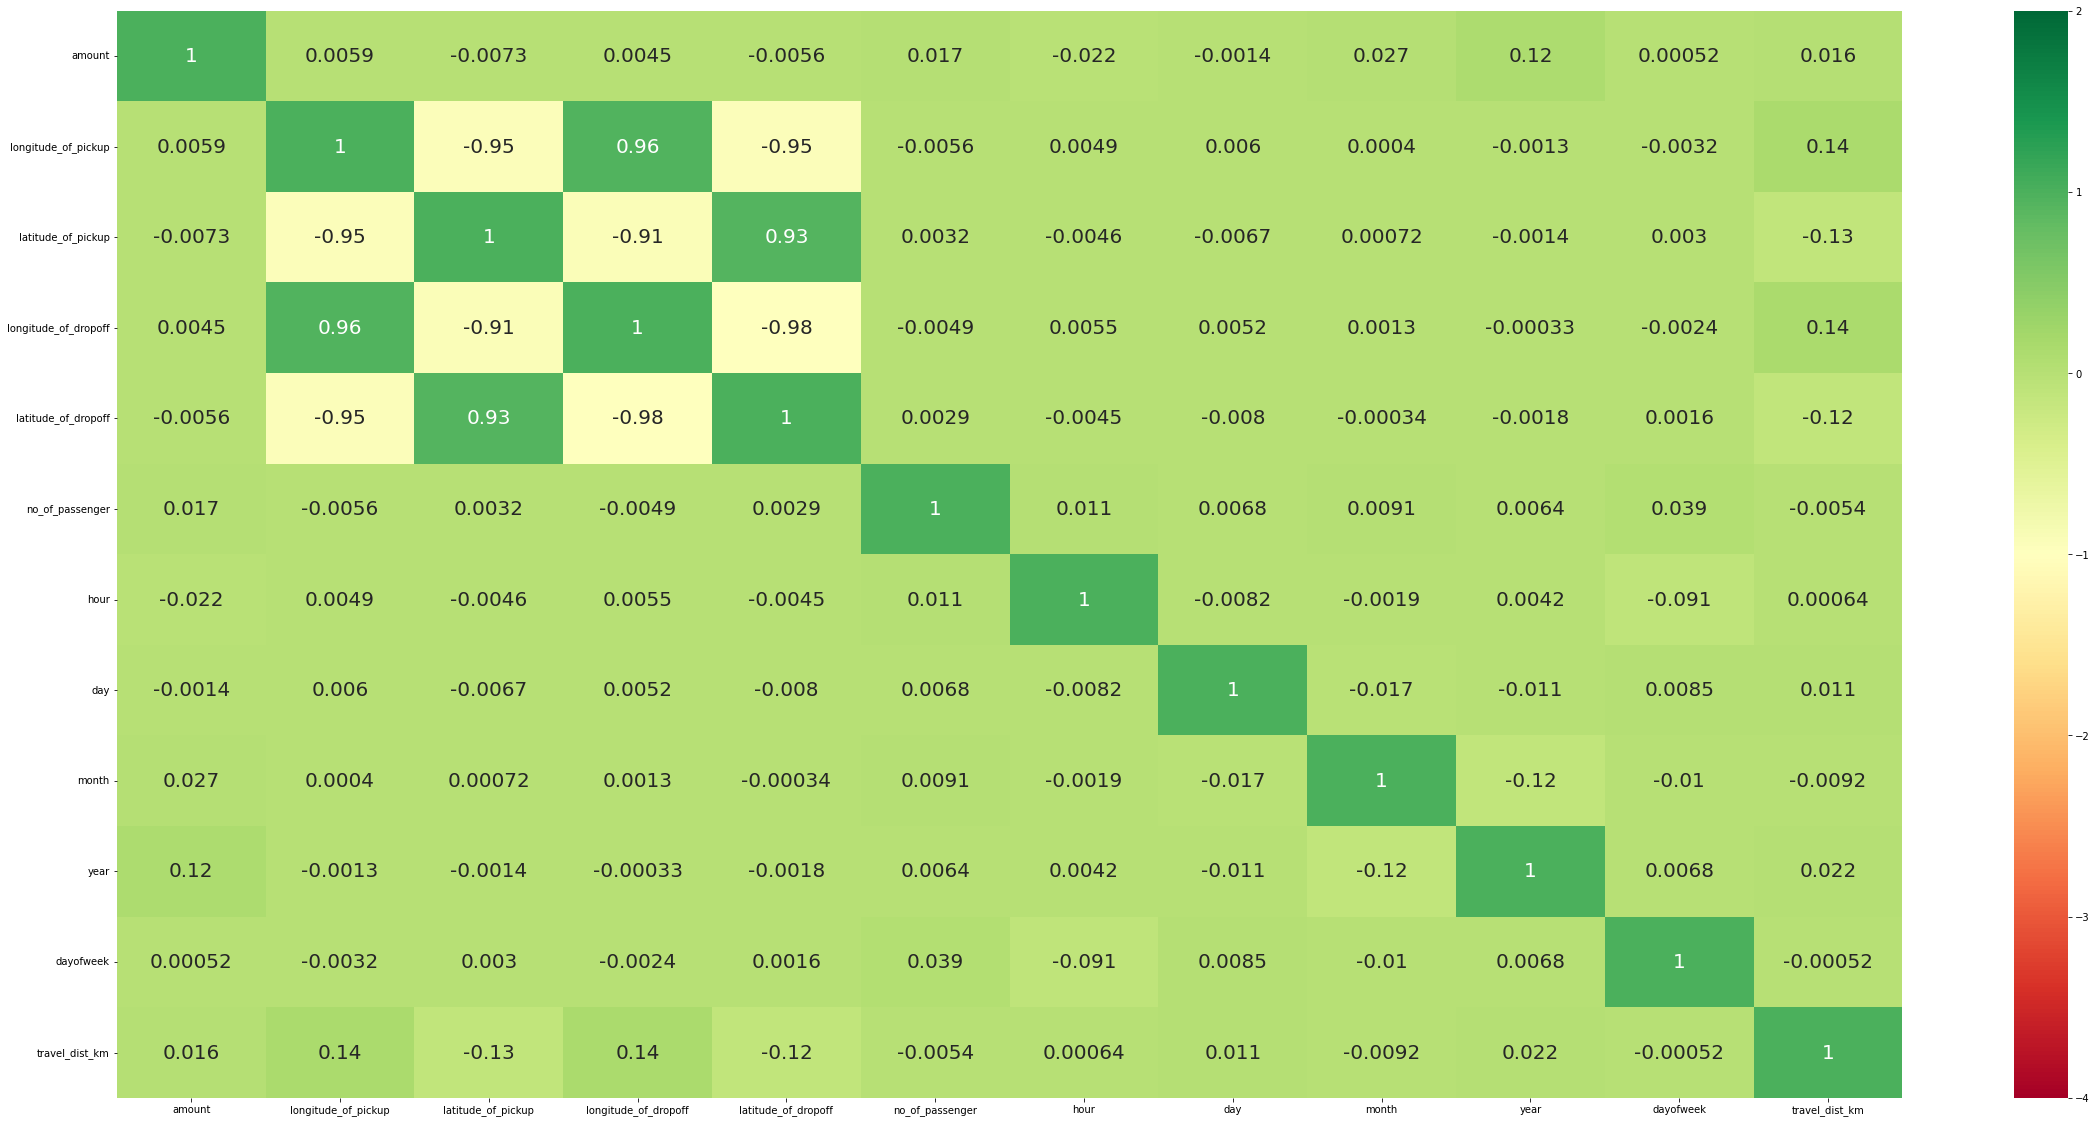

In [24]:
plt.figure(figsize = (40,20))
mask = np.zeros_like(taxi.corr())

sns.heatmap(taxi.corr(), cmap = 'RdYlGn', vmax = 2.0, vmin = -4.0, annot = True, annot_kws = {"size": 20}, mask = mask)


## 3.2 Exploratory Data Analysis

## 3.2.1 Peak hours

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> We will check the peak hours during the following: <br><br>
                        1. Weekdays <br>
                        2. Weekends <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:title={'center':'Taxi trips count during week days'}, xlabel='hour', ylabel='count'>

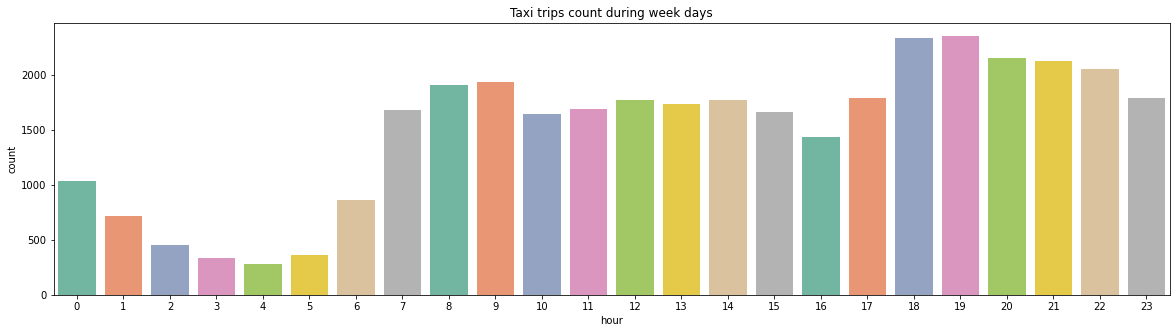

In [25]:
plt.figure(figsize=(20,5))
plt.title('Taxi trips count during week days')
sns.countplot(x='hour', data=taxi.loc[(taxi.dayofweek >= 0) & (taxi.dayofweek <=4)], palette='Set2')

<AxesSubplot:title={'center':'Taxi trips count during week ends'}, xlabel='hour', ylabel='count'>

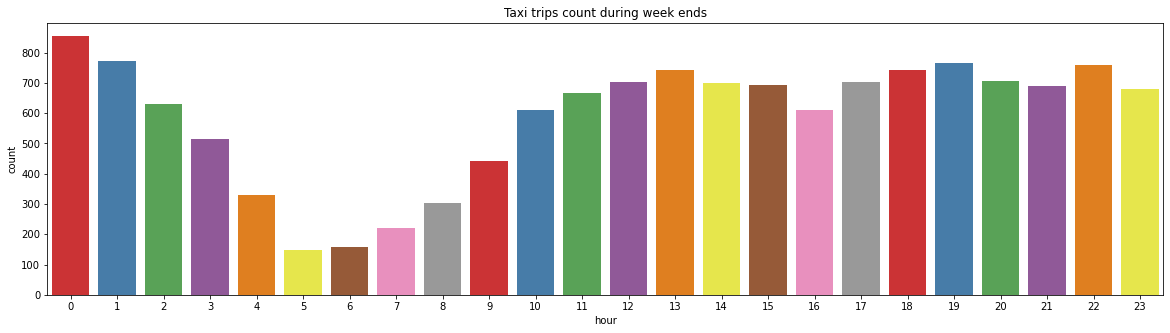

In [26]:
plt.figure(figsize=(20,5))
plt.title('Taxi trips count during week ends')
sns.countplot(x='hour', data=taxi.loc[(taxi.dayofweek >= 5) & (taxi.dayofweek <=6)], palette='Set1')

## 3.2.2 Mean fare for each hour during weekdays and weekends

In [27]:
week_days = taxi.loc[(taxi.dayofweek >= 0) & (taxi.dayofweek <= 4)]
week_ends = taxi.loc[(taxi.dayofweek >= 5) & (taxi.dayofweek <= 6)]
week_days_fare = week_days.groupby(['hour']).amount.mean().to_frame().reset_index()
week_ends_fare = week_ends.groupby(['hour']).amount.mean().to_frame().reset_index()

In [28]:
week_days_fare

,hour,amount
0,0,12.079275
1,1,12.522360
2,2,10.929956
3,3,11.837477
4,4,14.961357
5,5,15.502702
6,6,11.438986
7,7,10.863713
8,8,10.468992
9,9,10.699696


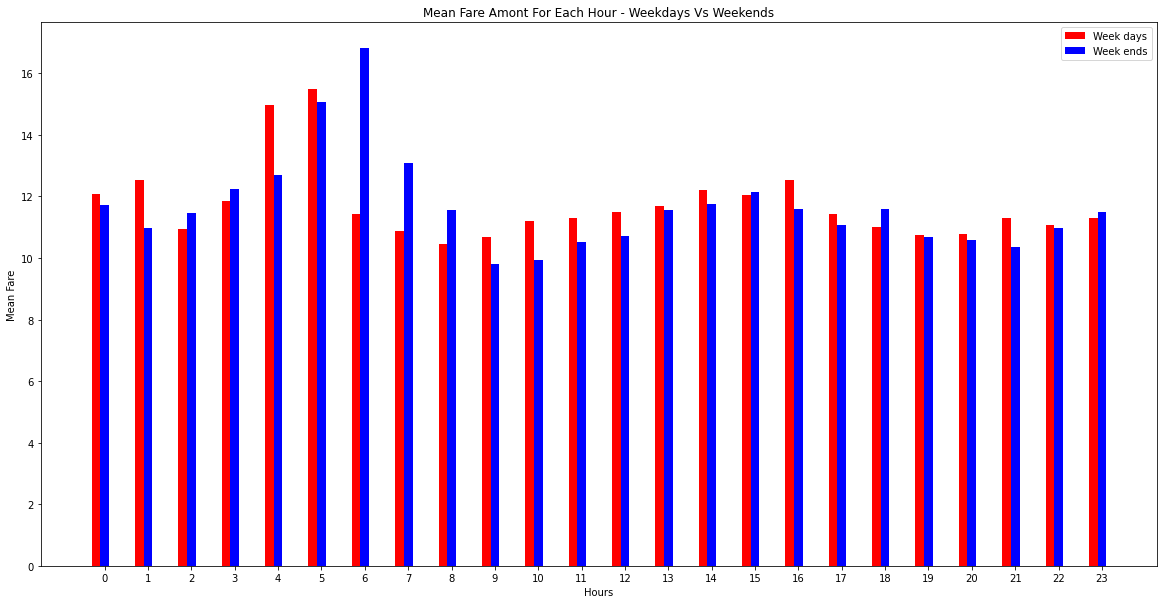

In [29]:
x = np.array(week_days_fare.hour)
y = np.array(week_days_fare.amount)
z = np.array(week_ends_fare.amount)
plt.figure(figsize = (20,10))
plt.title('Mean Fare Amont For Each Hour - Weekdays Vs Weekends')
plt.xlabel('Hours')
plt.ylabel('Mean Fare')
ax=plt.subplot(1,1,1)
ax.bar(x-0.2, y, width=0.2, color='red', align='center', label = 'Week days')
ax.bar(x, z, width=0.2, color='blue', align='center', label = 'Week ends')
plt.xticks(range(0,24))
plt.legend()

## 3.2.3 Distribution of key numerical vairables

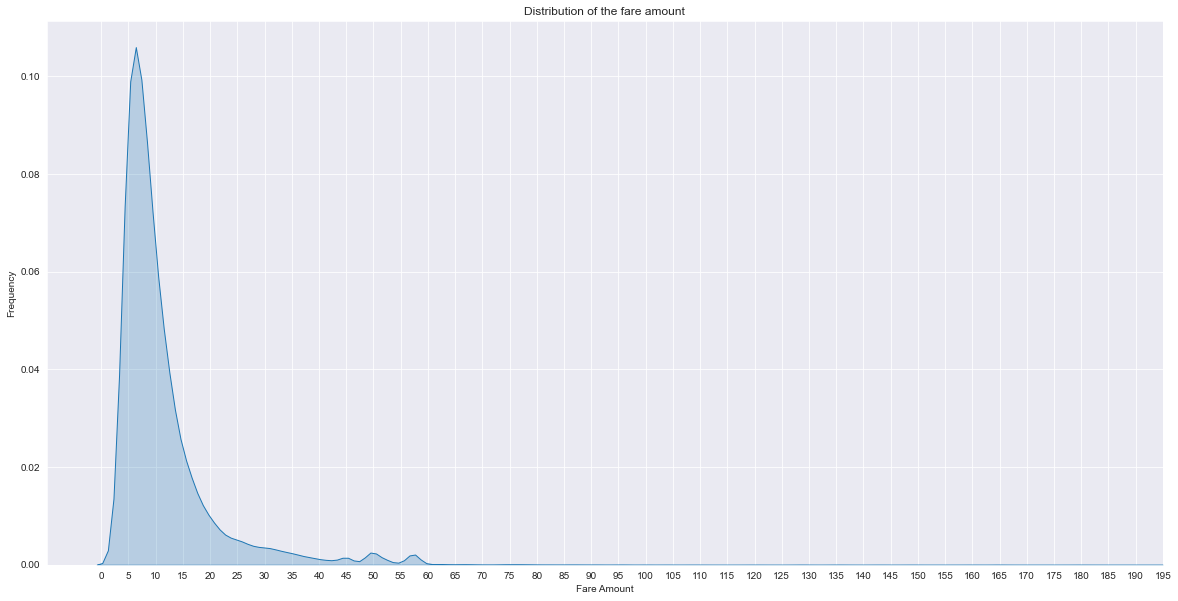

In [30]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
plt.title("Distribution of the fare amount")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.xlim(-10,20)
plt.xticks(range(0,200,5))

snsplot = sns.kdeplot(taxi.amount, shade=True)


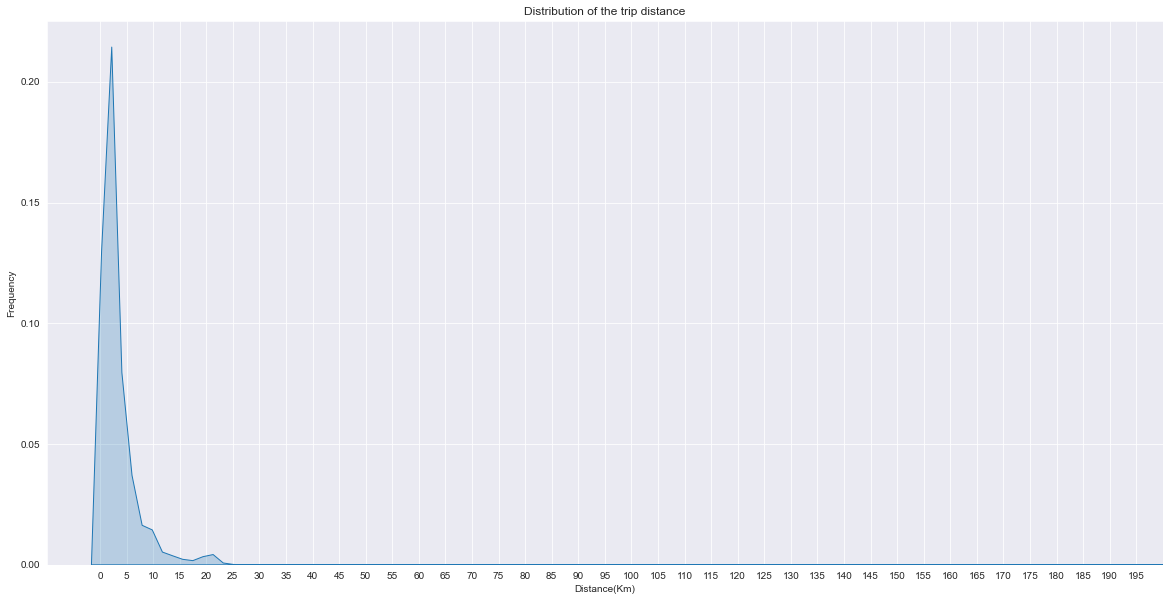

In [31]:
plt.figure(figsize = (20,10))
sns.style = ('darkgrid')
plt.title("Distribution of the trip distance")
plt.xlabel("Distance(Km)")
plt.ylabel("Frequency")
plt.xlim(-10, 200)
plt.xticks(range(0,200,5))

sns.plot = sns.kdeplot(taxi[taxi.travel_dist_km<600].travel_dist_km, shade=True)

## 4. Random Forest

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
        <b>random forest model</b>
                </font>
              <div>
            </td>
        </tr>       
     </table>   

In [32]:
y = pd.DataFrame(taxi['amount'])

In [33]:
X = taxi.drop('amount',axis = 1)

In [34]:
X.head()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
0,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0,1.030764
1,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1,8.450134
2,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3,1.389525
3,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5,2.799270
4,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1,1.999157


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print("X_train-",X_train.shape)
print("X_test-",X_test.shape)
print("y_train-",y_train.shape)
print("y_test-",y_test.shape)

X_train- (34993, 11)
X_test- (14997, 11)
y_train- (34993, 1)
y_test- (14997, 1)


In [36]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [37]:
y_pred = rf_reg.predict(X_test)

In [39]:
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 2.0364987930919516
Mean Squared Error (MSE): 18.78625911903321
Root Mean Squared Error (RMSE): 4.334311839154309


In [40]:
cols = ['Model', 'MAE', 'MSE', 'RMSE']
result_tabulation = pd.DataFrame(columns = cols)
rf_reg_metrics = pd.Series({'Model': "Random Forest ",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE     
                   })
result_tabulation = result_tabulation.append(rf_reg_metrics, ignore_index = True)
result_tabulation

,Model,MAE,MSE,RMSE
0,Random Forest,2.036499,18.786259,4.334312


## Conclusion

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The regression algorithms named in the above table have been implemented on the given dataset. The performance of the models were evaluated using MAE, MSE,RMSE. <br>
                    </b>
                </font>
             </div>
        </td>
    </tr>
</table>